In [1]:
import pandas as pd
import numpy as np
import pygad

In [2]:
data = pd.read_csv('data1.csv')
data

,KOTA,A,B,C,D,E,F
0,A,0,1,5,5,5,1
1,B,1,0,1,5,5,5
2,C,5,1,0,1,5,5
3,D,5,5,1,0,1,5
4,E,5,5,5,1,0,1
5,F,1,5,5,5,1,0


In [8]:
np.sum([data.iloc[0, 5+1],
      data.iloc[5, 2+1],
      data.iloc[2, 3+1],
      data.iloc[3, 4+1],
      data.iloc[4, 1+1],
      data.iloc[1, 0+1]])

14

In [4]:
def cal_fitness(ga_instance, solution, solution_idx):
    solution = np.sum([data.iloc[0, solution[0]+1],
      data.iloc[solution[0], solution[1]+1],
      data.iloc[solution[1], solution[2]+1],
      data.iloc[solution[2], solution[3]+1],
      data.iloc[solution[3], solution[4]+1],
      data.iloc[solution[4], 1]])
    return -solution

In [5]:
len(data)

6

In [6]:
def on_generation(ga):
    print("Generation", ga.generations_completed)
    print(ga.population)

In [7]:
ga_instance = pygad.GA(num_generations = 100,
                       num_parents_mating = 2,
                       fitness_func = cal_fitness,
                       sol_per_pop = 10,
                       num_genes = 5,
                       gene_type = int,
                       gene_space = np.arange(1,len(data)),
                       allow_duplicate_genes=False,
                       on_generation=on_generation,
                       mutation_type='random',
                       mutation_percent_genes=50
                       )

/home/fafa/miniconda3/envs/py311/lib/python3.11/site-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


In [8]:
ga_instance.run()

Generation 1
[[1 3 2 5 4]
 [1 5 2 3 4]
 [1 2 5 4 3]
 [1 3 2 5 4]
 [4 5 2 1 3]
 [5 1 2 3 4]
 [3 1 5 2 4]
 [4 1 5 3 2]
 [4 2 3 1 5]
 [4 1 2 3 5]]
Generation 2
[[5 1 2 3 4]
 [5 1 2 4 3]
 [1 5 2 3 4]
 [1 3 5 4 2]
 [1 5 3 2 4]
 [2 1 5 4 3]
 [5 1 2 3 4]
 [5 1 2 4 3]
 [2 1 5 3 4]
 [5 1 2 4 3]]
Generation 3
[[5 1 2 3 4]
 [3 1 2 5 4]
 [1 4 2 3 5]
 [5 1 2 3 4]
 [5 2 1 3 4]
 [5 1 2 3 4]
 [5 1 2 3 4]
 [5 1 4 3 2]
 [4 1 2 3 5]
 [1 5 2 3 4]]
Generation 4
[[5 1 2 3 4]
 [5 3 4 1 2]
 [5 3 2 1 4]
 [4 1 3 2 5]
 [5 4 2 3 1]
 [5 1 2 3 4]
 [5 1 2 3 4]
 [3 1 2 5 4]
 [5 2 1 3 4]
 [4 1 2 3 5]]
Generation 5
[[5 1 2 3 4]
 [2 5 1 3 4]
 [5 2 1 3 4]
 [5 4 2 3 1]
 [3 1 2 5 4]
 [5 4 2 3 1]
 [5 1 2 3 4]
 [5 1 4 3 2]
 [1 5 2 3 4]
 [2 1 5 3 4]]
Generation 6
[[5 1 2 3 4]
 [5 2 1 3 4]
 [2 4 5 3 1]
 [3 4 2 5 1]
 [2 3 5 1 4]
 [2 1 5 4 3]
 [3 4 2 5 1]
 [5 1 2 3 4]
 [3 4 2 5 1]
 [2 1 5 3 4]]
Generation 7
[[5 1 2 3 4]
 [5 1 2 3 4]
 [5 3 2 1 4]
 [2 1 5 3 4]
 [2 1 5 3 4]
 [5 1 2 3 4]
 [2 1 5 3 4]
 [5 1 3 2 4]
 [2 1 5 3 4]
 [5 3 

In [9]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print(f"Parameters of the best solution : {solution}")
print(f"Fitness value of the best solution = {solution_fitness}")
print(f"Index of the best solution : {solution_idx}")

Parameters of the best solution : [1 2 3 4 5]
Fitness value of the best solution = -6
Index of the best solution : 0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


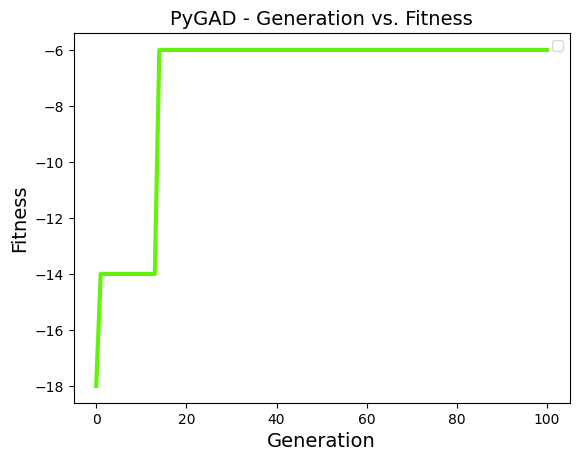

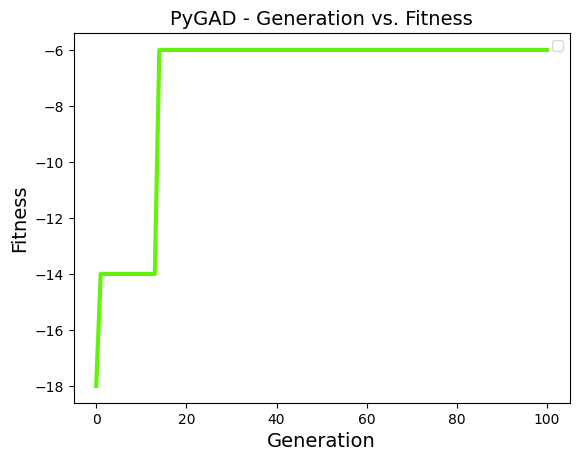

In [10]:
ga_instance.plot_fitness()